# Breast Cancer Diagnosis Using Machine Learning on Fine Needle Aspiration (FNA) of Breast Mass Histology Samples.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
import ipython_blocking

In [2]:
tumor = load_breast_cancer()
tumor_df = pd.DataFrame(tumor.data, columns=tumor.feature_names)
tumor_df['Cancerous'] = pd.Series(tumor.target)
tumor_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancerous
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
<blockquote>Descriptive statistics for breast cancer dataset. Dataset contained 569 fine needle aspiration (FNA) samples where each sample contained 30 attributes. Dataset is comprised of 212 
malignant samples and 357 benign samples. </blockquote>

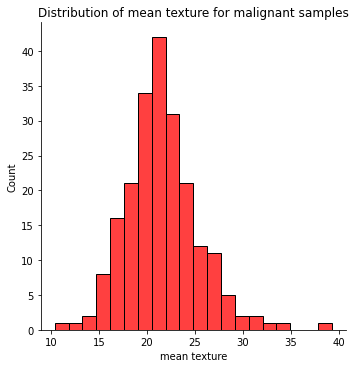

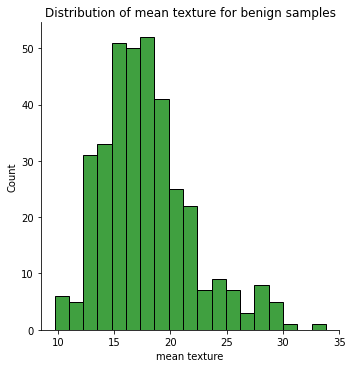

In [3]:
axes4 = sns.displot(tumor_df[tumor_df['Cancerous']==0]['mean texture'], color='red', label='Cancerous').set(title='Distribution of mean texture for malignant samples')
#axes4.set_title('Distribution of mean texture for malignant samples')
axes5 = sns.displot(tumor_df[tumor_df['Cancerous']==1]['mean texture'], color='green', label='Benign').set(title='Distribution of mean texture for benign samples')
#axes5.set_title('Distribution of mean texture for benign sampes')

<blockquote>Distribution plots illustrating the distribution of the mean texture attribute for malignant (red) and benign (green) samples </blockquote>

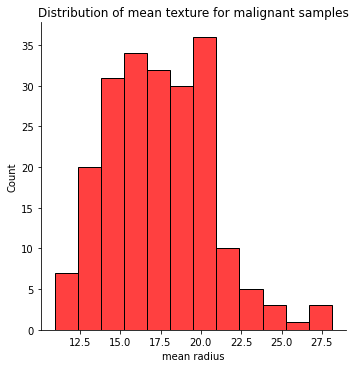

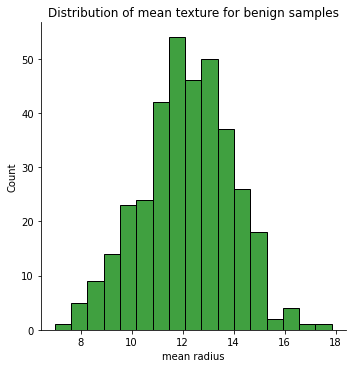

In [4]:
axes9 = sns.displot(tumor_df[tumor_df['Cancerous']==0]['mean radius'], color='red', label='Cancerous').set(title='Distribution of mean texture for malignant samples')
#axes4.set_title('Distribution of mean texture for malignant samples')
axes10 = sns.displot(tumor_df[tumor_df['Cancerous']==1]['mean radius'], color='green', label='Benign').set(title='Distribution of mean texture for benign samples')
#axes5.set_title('Distribution of mean texture for benign sampes')

In [ ]:
<blockquote>Distribution plots illustrating the distribution of the mean radius attribute for malignant (red) and benign (green) samples </blockquote>

C:\Users\Keith Joint\AppData\Local\Temp\ipykernel_12380\1142207815.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure)


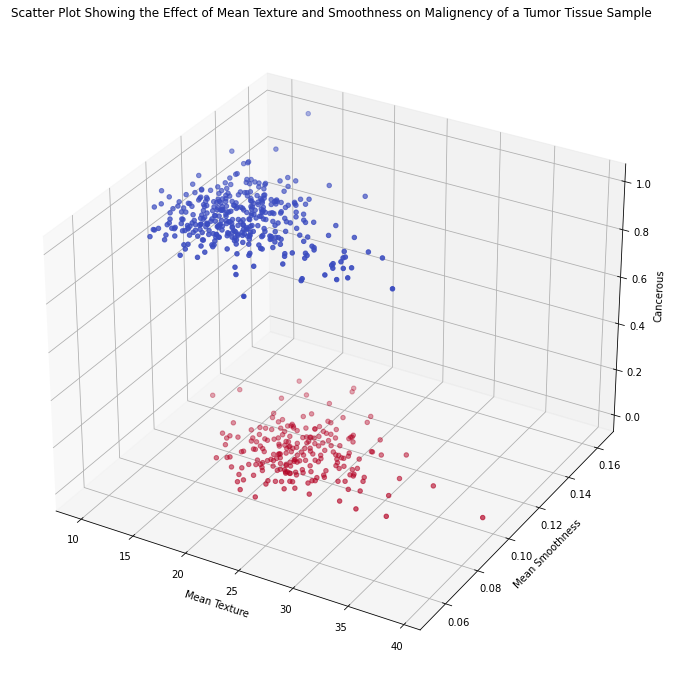

In [5]:
#%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
x = tumor_df['mean texture']
y = tumor_df['mean smoothness']
z = tumor.target
figure = plt.figure(figsize=(9, 9))
#axes = figure.add_subplot(111, projection='3d')
axes = Axes3D(figure)
axes.set_xlabel('Mean Texture')
axes.set_ylabel('Mean Smoothness')
axes.set_zlabel('Cancerous')
axes.set_title('Scatter Plot Showing the Effect of Mean Texture and Smoothness on Malignency of a Tumor Tissue Sample')
dots =axes.scatter(xs=x, ys=y, zs=z, c=tumor.target, cmap=plt.cm.get_cmap('coolwarm_r', 2))

In [ ]:
<blockquote>Three dimensional scatter plot showing the relationship of mean texture, mean smoothness and malignancy. Malignant tumors are denoted by '0' and benign tumors are denoted by '1' 
on the Z axis.</blockquote>

In [6]:
dropdown = widgets.Dropdown(options=[' ', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
dropdown

Dropdown(options=(' ', '10', '20', '30', '40', '50', '60', '70', '80', '90'), value=' ')

In [ ]:
%block dropdown

In [8]:
split = int(dropdown.value)
print(split)

40


In [9]:
dropdown2 = widgets.Dropdown(options=[' ', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
dropdown2

Dropdown(options=(' ', '10', '20', '30', '40', '50', '60', '70', '80', '90'), value=' ')

In [11]:
%block dropdown2

In [12]:
split2 = int(dropdown2.value)
print(split2)

90


In [13]:
psplit = split / 100
psplit2 = split2 /100

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tumor.data, tumor.target, random_state=11, train_size = psplit)
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [15]:
predicted = knn.predict(X=X_test)
expected = y_test
result1 = int(knn.score(X_test, y_test) * 100)
print(f'{knn.score(X_test, y_test): .2%}')
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

 92.40%


In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(tumor.data, tumor.target, random_state=11, train_size = psplit2)
knn = KNeighborsClassifier()
knn.fit(X=X1_train, y=y1_train)

KNeighborsClassifier()

In [17]:
predicted = knn.predict(X=X1_test)
expected = y1_test
result2 = int(knn.score(X1_test, y1_test) * 100)
print(f'{knn.score(X1_test, y1_test): .2%}')
confusion_1 = confusion_matrix(y_true=expected, y_pred=predicted)

 92.98%


In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(tumor.data, tumor.target, random_state=11)
knn = KNeighborsClassifier()
knn.fit(X=X2_train, y=y2_train)

KNeighborsClassifier()

In [19]:
predicted = knn.predict(X=X2_test)
expected = y2_test
default = int(knn.score(X2_test, y2_test) * 100)
# default_split = y_train.size
print(f'{knn.score(X2_test, y2_test): .2%}')
confusion_2 = confusion_matrix(y_true=expected, y_pred=predicted)

 94.41%


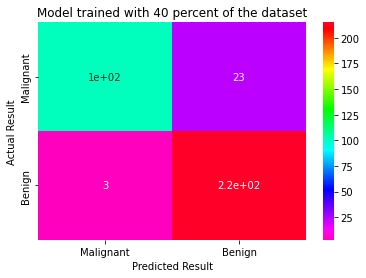

In [20]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
confusion_df1 = pd.DataFrame(confusion_1, index=range(2), columns=range(2))
confusion_df2 = pd.DataFrame(confusion_2, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='gist_rainbow_r')
axes.set_title('Model trained with %i percent of the dataset' %split)
axes.set_xlabel('Predicted Result')
axes.set_ylabel('Actual Result')
axes.xaxis.set_ticklabels(['Malignant', 'Benign']); axes.yaxis.set_ticklabels(['Malignant', 'Benign']);

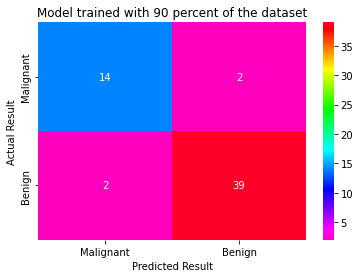

In [21]:
axes1 = sns.heatmap(confusion_df1, annot=True, cmap='gist_rainbow_r')
axes1.set_title('Model trained with %i percent of the dataset' %split2)
axes1.set_xlabel('Predicted Result')
axes1.set_ylabel('Actual Result')
axes1.xaxis.set_ticklabels(['Malignant', 'Benign']); axes1.yaxis.set_ticklabels(['Malignant', 'Benign']);

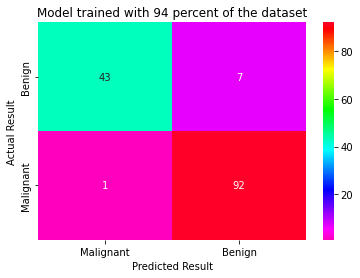

In [22]:
axes2 = sns.heatmap(confusion_df2, annot=True, cmap='gist_rainbow_r')
axes2.set_title('Model trained with %i percent of the dataset' %default)
axes2.set_xlabel('Predicted Result')
axes2.set_ylabel('Actual Result')
axes2.xaxis.set_ticklabels(['Malignant', 'Benign']); axes2.yaxis.set_ticklabels(['Benign', 'Malignant']);

In [ ]:
<blockquote>Confusion matrix heat maps for the two user selected training splits and the default training slpit for k nearest neighbors model. </blockquote>

In [23]:
print(f"Accuracy of model trained with {split} % of the dataset was {result1} % accurate")

Accuracy of model trained with 40 % of the dataset was 92 % accurate


In [24]:
f"Accuracy of model trained with {split2}% of the dataswt was {result2} % accurate"

'Accuracy of model trained with 90% of the dataswt was 92 % accurate'

In [25]:
f"Accuracy of model trained with the default train_test split was {default}% accurate"

'Accuracy of model trained with the default train_test split was 94% accurate'

In [26]:
%load_ext watermark
%watermark -v -m -p sklearn,pandas,seaborn,matplotlib,watermark,ipywidgets,ipy_blocking

print(" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.2.0

sklearn     : 1.0.2
pandas      : 1.4.2
seaborn     : 0.11.2
matplotlib  : 3.5.1
watermark   : 2.3.0
ipywidgets  : 7.6.5
ipy_blocking: not installed

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sun Apr 24 2022 15:15:39Eastern Daylight Time

